# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Sebastián Alejandro Soria Piñuela

- ID:A01645849

- My carreer: ITC (Ingeniería en tecnologías computacionales)


# Importing libraries

In [257]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

In [258]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/TC1002S/NotebooksProfessor/"

else:
    # Define path del proyecto
    Ruta            = "ño"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [259]:
# url string that hosts our .csv file
url = Ruta + "A01645849_X.csv"
print(url)

# Read the .csv file and store it as a pandas Data Frame

dt = pd.read_csv(url)

/content/drive/My Drive/TC1002S/NotebooksProfessor/A01645849_X.csv


# PART 1

## Do clustering using your assigned dataset

## a) Load data

In [260]:
dt

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,0,0.869695,4.650194,2.135345,8.941562,0.663149,-7.358718,-7.601344,5.991406,0.752541
1,1,-9.223693,-3.245195,8.810585,0.074535,-0.489090,7.482702,-4.854415,4.547358,11.250023
2,2,7.777031,-1.670355,-3.182830,2.069812,-7.556666,8.759035,3.530956,-7.062885,4.098302
3,3,-0.923299,5.103181,-0.035035,4.980418,2.772040,-8.598040,-4.857350,7.401998,-1.579338
4,4,-10.958181,-0.521441,11.979776,0.679448,-1.157686,7.415256,-7.321623,3.767492,6.007661
...,...,...,...,...,...,...,...,...,...,...
568,568,-8.976283,10.257977,3.278006,6.370068,1.275627,3.341496,-6.348379,6.107112,1.409293
569,569,-8.061726,-3.704356,9.095802,-1.226538,-0.692414,4.317334,-4.862296,1.605972,6.608127
570,570,-8.534535,12.674948,6.153460,5.863986,-3.008260,6.930498,-9.977399,5.463710,-0.689680
571,571,3.617187,-11.201330,-4.603593,2.725584,-0.567515,-7.579039,-4.453304,-5.034733,-0.514626


## b) Data managment


Print the first 7 rows

In [261]:
dt.head(7)

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,0,0.869695,4.650194,2.135345,8.941562,0.663149,-7.358718,-7.601344,5.991406,0.752541
1,1,-9.223693,-3.245195,8.810585,0.074535,-0.489090,7.482702,-4.854415,4.547358,11.250023
2,2,7.777031,-1.670355,-3.182830,2.069812,-7.556666,8.759035,3.530956,-7.062885,4.098302
3,3,-0.923299,5.103181,-0.035035,4.980418,2.772040,-8.598040,-4.857350,7.401998,-1.579338
4,4,-10.958181,-0.521441,11.979776,0.679448,-1.157686,7.415256,-7.321623,3.767492,6.007661
5,5,-8.760165,4.622608,11.410454,-1.136500,-5.472360,8.870464,-6.100812,6.550819,4.149339
6,6,5.584800,-5.526043,-8.408736,-0.623538,1.410260,-6.318814,-7.722265,-4.740610,-1.840643


Print the last 4 rows

In [262]:
dt.tail(4)

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9
569,569,-8.061726,-3.704356,9.095802,-1.226538,-0.692414,4.317334,-4.862296,1.605972,6.608127
570,570,-8.534535,12.674948,6.153460,5.863986,-3.008260,6.930498,-9.977399,5.463710,-0.689680
571,571,3.617187,-11.201330,-4.603593,2.725584,-0.567515,-7.579039,-4.453304,-5.034733,-0.514626
572,572,-5.442359,3.878238,-0.678036,-5.234183,2.602155,-2.584012,-5.578367,-10.796719,4.868557


How many rows and columns are in your data?

Use the `shape` method


In [263]:
R,C = dt.shape

print(f"La cantidad de filas es {R} y de columnas es {C}")
print(dt.shape)

La cantidad de filas es 573 y de columnas es 10
(573, 10)


Print the name of all columns

Use the `columns` method

In [264]:
print("Es importante mencionar que la primera columna no tiene nombre, por lo que toma el primer valor")
print(dt.columns)
print("Nombres sin la primera columna")
print(dt.columns[1:])

Es importante mencionar que la primera columna no tiene nombre, por lo que toma el primer valor
Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9'], dtype='object')
Nombres sin la primera columna
Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9'], dtype='object')


What is the data type in each column

Use the `dtypes` method

In [265]:
dt.dtypes

,0
Unnamed: 0,int64
x1,float64
x2,float64
x3,float64
x4,float64
x5,float64
x6,float64
x7,float64
x8,float64
x9,float64


What is the meaning of rows and columns?

El significado de rows and columns es "filas y columnas" respectivamente. En sí, son términos usados para describir alguna estructura de datos, ya sea una tabla, una base de datos, etc. Las filas van horizontalmente (izquierda - derecha) y las columnas verticalmente (arriba - abajo)

Print a statistical summary of your columns


In [266]:
print("Summary incluyendo la primera columna")
dt.describe()

Summary incluyendo la primera columna


,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,286.000000,-1.756149,1.384076,0.992282,1.815419,-0.260753,1.345355,-4.168803,-0.593178,1.597662
std,165.555127,7.162072,5.765437,5.448925,5.370738,4.842335,7.637972,6.123178,5.845492,3.436739
min,0.000000,-14.386195,-13.732135,-12.133297,-11.985111,-13.377531,-13.622375,-13.937528,-14.446422,-6.680731
25%,143.000000,-8.483190,-3.155754,-2.462313,-0.776172,-2.435158,-6.446744,-8.041236,-5.326541,-0.976020
50%,286.000000,-1.288879,1.217728,1.222700,2.081670,0.168856,2.285006,-6.012596,0.294399,1.127452
75%,429.000000,5.144269,5.729237,4.504158,6.037739,2.757773,8.203745,-3.750852,4.551435,3.838046
max,572.000000,12.878305,13.451765,14.021666,12.495187,10.562114,15.051109,13.702098,11.832325,11.250023


1.- What is the minumum and maximum values of each variable:

In [267]:
print("ES EL VALOR Máximo y Mínimo de cada variable")
dt.max()

ES EL VALOR Máximo y Mínimo de cada variable


,0
Unnamed: 0,572.000000
x1,12.878305
x2,13.451765
x3,14.021666
x4,12.495187
x5,10.562114
x6,15.051109
x7,13.702098
x8,11.832325
x9,11.250023


In [268]:
dt.min()

,0
Unnamed: 0,0.000000
x1,-14.386195
x2,-13.732135
x3,-12.133297
x4,-11.985111
x5,-13.377531
x6,-13.622375
x7,-13.937528
x8,-14.446422
x9,-6.680731


2.- What is the mean and standar deviation of each variable:

In [269]:
print("El mean es el promedio de los datos de cada columna y la desviación estándar es la variabilidad de los datos en base a una media(promedio)")
dt.mean()

El mean es el promedio de los datos de cada columna y la desviación estándar es la variabilidad de los datos en base a una media(promedio)


,0
Unnamed: 0,286.000000
x1,-1.756149
x2,1.384076
x3,0.992282
x4,1.815419
x5,-0.260753
x6,1.345355
x7,-4.168803
x8,-0.593178
x9,1.597662


In [270]:
dt.std()

,0
Unnamed: 0,165.555127
x1,7.162072
x2,5.765437
x3,5.448925
x4,5.370738
x5,4.842335
x6,7.637972
x7,6.123178
x8,5.845492
x9,3.436739


3.-What the 25%, 50% and 75% represent?:

25% (1.er cuartil, T1): Valor por debajo del cual se encuentra el 25% de los datos. Es la mediana de la mitad inferior del conjunto de datos.

50% (2.º cuartil, T2 o mediana): Valor que divide el conjunto de datos por la mitad. El 50% de los datos se encuentra por debajo de este valor y el 50% por encima.

75% (3.er cuartil, T3): Valor por debajo del cual se encuentra el 75% de los datos. Es la mediana de la mitad superior del conjunto de datos.

Rename the columns using the same name with capital letters

In [271]:
dt = dt.rename(columns={"x1": "X1"})
dt = dt.rename(columns={"x2": "X2"})
dt = dt.rename(columns={"x3": "X3"})
dt = dt.rename(columns={"x4": "X4"})
dt = dt.rename(columns={"x5": "X5"})
dt = dt.rename(columns={"x6": "X6"})
dt = dt.rename(columns={"x7": "X7"})
dt = dt.rename(columns={"x8": "X8"})
dt = dt.rename(columns={"x9": "X9"})

dt.head(5)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,0,0.869695,4.650194,2.135345,8.941562,0.663149,-7.358718,-7.601344,5.991406,0.752541
1,1,-9.223693,-3.245195,8.810585,0.074535,-0.489090,7.482702,-4.854415,4.547358,11.250023
2,2,7.777031,-1.670355,-3.182830,2.069812,-7.556666,8.759035,3.530956,-7.062885,4.098302
3,3,-0.923299,5.103181,-0.035035,4.980418,2.772040,-8.598040,-4.857350,7.401998,-1.579338
4,4,-10.958181,-0.521441,11.979776,0.679448,-1.157686,7.415256,-7.321623,3.767492,6.007661


Rename the columns to their original names

In [272]:
dt = dt.rename(columns={"X1": "x1"})
dt = dt.rename(columns={"X2": "x2"})
dt = dt.rename(columns={"X3": "x3"})
dt = dt.rename(columns={"X4": "x4"})
dt = dt.rename(columns={"X5": "x5"})
dt = dt.rename(columns={"X6": "x6"})
dt = dt.rename(columns={"X7": "x7"})
dt = dt.rename(columns={"X8": "x8"})
dt = dt.rename(columns={"X9": "x9"})

dt.head(5)

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,0,0.869695,4.650194,2.135345,8.941562,0.663149,-7.358718,-7.601344,5.991406,0.752541
1,1,-9.223693,-3.245195,8.810585,0.074535,-0.489090,7.482702,-4.854415,4.547358,11.250023
2,2,7.777031,-1.670355,-3.182830,2.069812,-7.556666,8.759035,3.530956,-7.062885,4.098302
3,3,-0.923299,5.103181,-0.035035,4.980418,2.772040,-8.598040,-4.857350,7.401998,-1.579338
4,4,-10.958181,-0.521441,11.979776,0.679448,-1.157686,7.415256,-7.321623,3.767492,6.007661


Use two different alternatives to get one of the columns

In [273]:
#a = dt.x1
#b = dt["x1"]
c = dt.loc[:, "x1"]
d = dt.iloc[:,1]

#print(a)
#print(b)
print(c)
print("\n\n")
print(d)
print("\n\n")
dt["x1"]

0       0.869695
1      -9.223693
2       7.777031
3      -0.923299
4     -10.958181
         ...    
568    -8.976283
569    -8.061726
570    -8.534535
571     3.617187
572    -5.442359
Name: x1, Length: 573, dtype: float64



0       0.869695
1      -9.223693
2       7.777031
3      -0.923299
4     -10.958181
         ...    
568    -8.976283
569    -8.061726
570    -8.534535
571     3.617187
572    -5.442359
Name: x1, Length: 573, dtype: float64





,x1
0,0.869695
1,-9.223693
2,7.777031
3,-0.923299
4,-10.958181
...,...
568,-8.976283
569,-8.061726
570,-8.534535
571,3.617187


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [274]:
 print("Impresión de la 2nda y 3ra columna sin considerar la primera que es del número de observaciones(ID)")
 df.iloc[62:73, 2:4]

Impresión de la 2nda y 3ra columna sin considerar la primera que es del número de observaciones(ID)


,x2,x3
62,10.034837,5.021405
63,10.116020,4.012460
64,8.989819,5.543506
65,4.724859,4.504158
66,1.105713,3.414224
67,2.576449,-4.155456
68,-3.379561,6.025190
69,1.099470,8.753819
70,-6.425215,-8.025607
71,6.374440,2.450050


In [275]:
 print("Impresión de la 2nda y 3ra columna considerando la primera columna")
 dt.iloc[62:73, 1:3]

Impresión de la 2nda y 3ra columna considerando la primera columna


,x1,x2
62,-10.174848,10.034837
63,-9.390460,10.116020
64,-6.922530,8.989819
65,-4.302450,4.724859
66,5.931398,1.105713
67,1.920127,2.576449
68,-7.202713,-3.379561
69,-8.407000,1.099470
70,3.168642,-6.425215
71,-8.380546,6.374440


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [276]:
# Total number of observations

print(f"Número de Observaciones {len(dt)}\n")


# total number of null observations in x1 and x2

print(f"Número de null en x1: {pd.isnull(dt.x1).sum()}")
print(f"Número de null en x2: {pd.isnull(dt.x2).sum()}")

# Total number of counts in x1 and x2 (excluding missing values)

print(f"Número de NOT null en x1: {pd.notnull(dt.x1).sum()}")
print(f"Número de NOT null en x2: {pd.notnull(dt.x2).sum()}")

if len(dt) == pd.notnull(dt.x1).sum() and len(dt) == pd.notnull(dt.x2).sum():
  print("\nVerificación: la suma iguala el número de filas, por lo que es correcto")

Número de Observaciones 573

Número de null en x1: 0
Número de null en x2: 0
Número de NOT null en x1: 573
Número de NOT null en x2: 573

Verificación: la suma iguala el número de filas, por lo que es correcto


Discard the last column


In [277]:
dt.drop(dt.columns[[9]], axis = 1, inplace = True)
#
dt.head()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8
0,0,0.869695,4.650194,2.135345,8.941562,0.663149,-7.358718,-7.601344,5.991406
1,1,-9.223693,-3.245195,8.810585,0.074535,-0.489090,7.482702,-4.854415,4.547358
2,2,7.777031,-1.670355,-3.182830,2.069812,-7.556666,8.759035,3.530956,-7.062885
3,3,-0.923299,5.103181,-0.035035,4.980418,2.772040,-8.598040,-4.857350,7.401998
4,4,-10.958181,-0.521441,11.979776,0.679448,-1.157686,7.415256,-7.321623,3.767492


### Questions

Based on the previos results, provide a full description of yout dataset

Your response:

El conjunto de datos que me tocó básicamente está compuesto por 10 columnas y 573 filas en total. A su vez, hay que mencionar que el número de observaciones es de 572 sin tener en cuenta la fila en la que están las variables. De igual manera, es importante mencionar que la primera columna contiene datos de la cantidad de observaciones o ID.




## c) Data visualization

Plot in the histogram of one of the variables

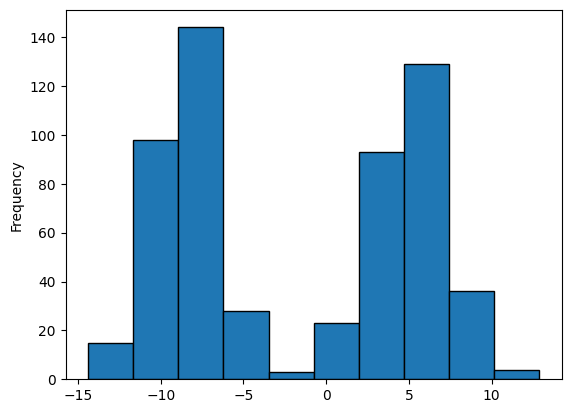

In [278]:
dt["x1"].plot(kind='hist', edgecolor='black')
plt.show()

Plot in the same figure the histogram of two variables



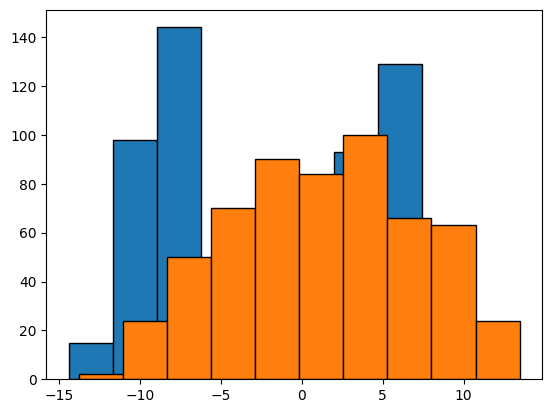

In [279]:
plt.hist(dt["x1"], edgecolor='black')
plt.hist(dt["x2"], edgecolor='black')
plt.show()

Based on these plots, provide a description of your data:

Your response here: En base a las gráficas que se pueden observar, se puede concluir que x1 tiene cambios bastante drásticos en sus valores, ya que, tiene unos desplomes y altos muy notorios. Por otro lado, x2 tiene cambios menos drásticos y más continuos tanto en la subida como en la bajada. También es importante mencionar que dentro del conjunto de datos hay valores negativos y esto es más visible en las gráficas.

Plot the boxplot of one of the variables

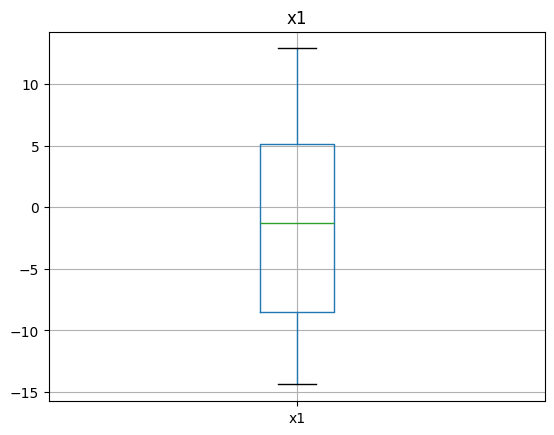

In [280]:
dt.boxplot('x1')
plt.title("x1")
plt.show()

Plot in the same figure the boxplot of two variables

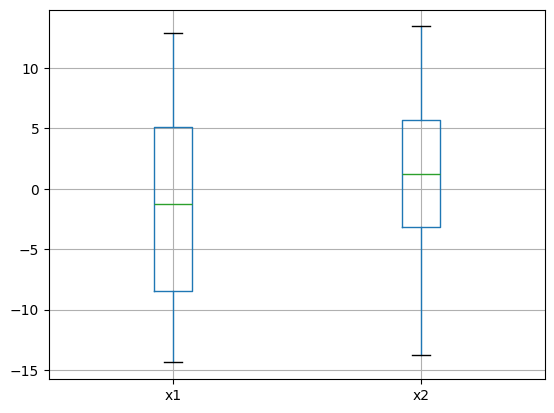

In [281]:

dt.boxplot(["x1","x2"])
plt.show()

Based on these plots, provide a description of your data:

Your response here: Basándome en los graficos obtenidos sobre x1 y x2 se puede afirmar las observaciones de x1 contienen mayor cantidad de números negativos, incluso hay valores menores a -5. Por otro lado, x2 tiene también valores negativos pero ninguno sobrepasa el -5.

Plot the scatter plot between all pair of variables

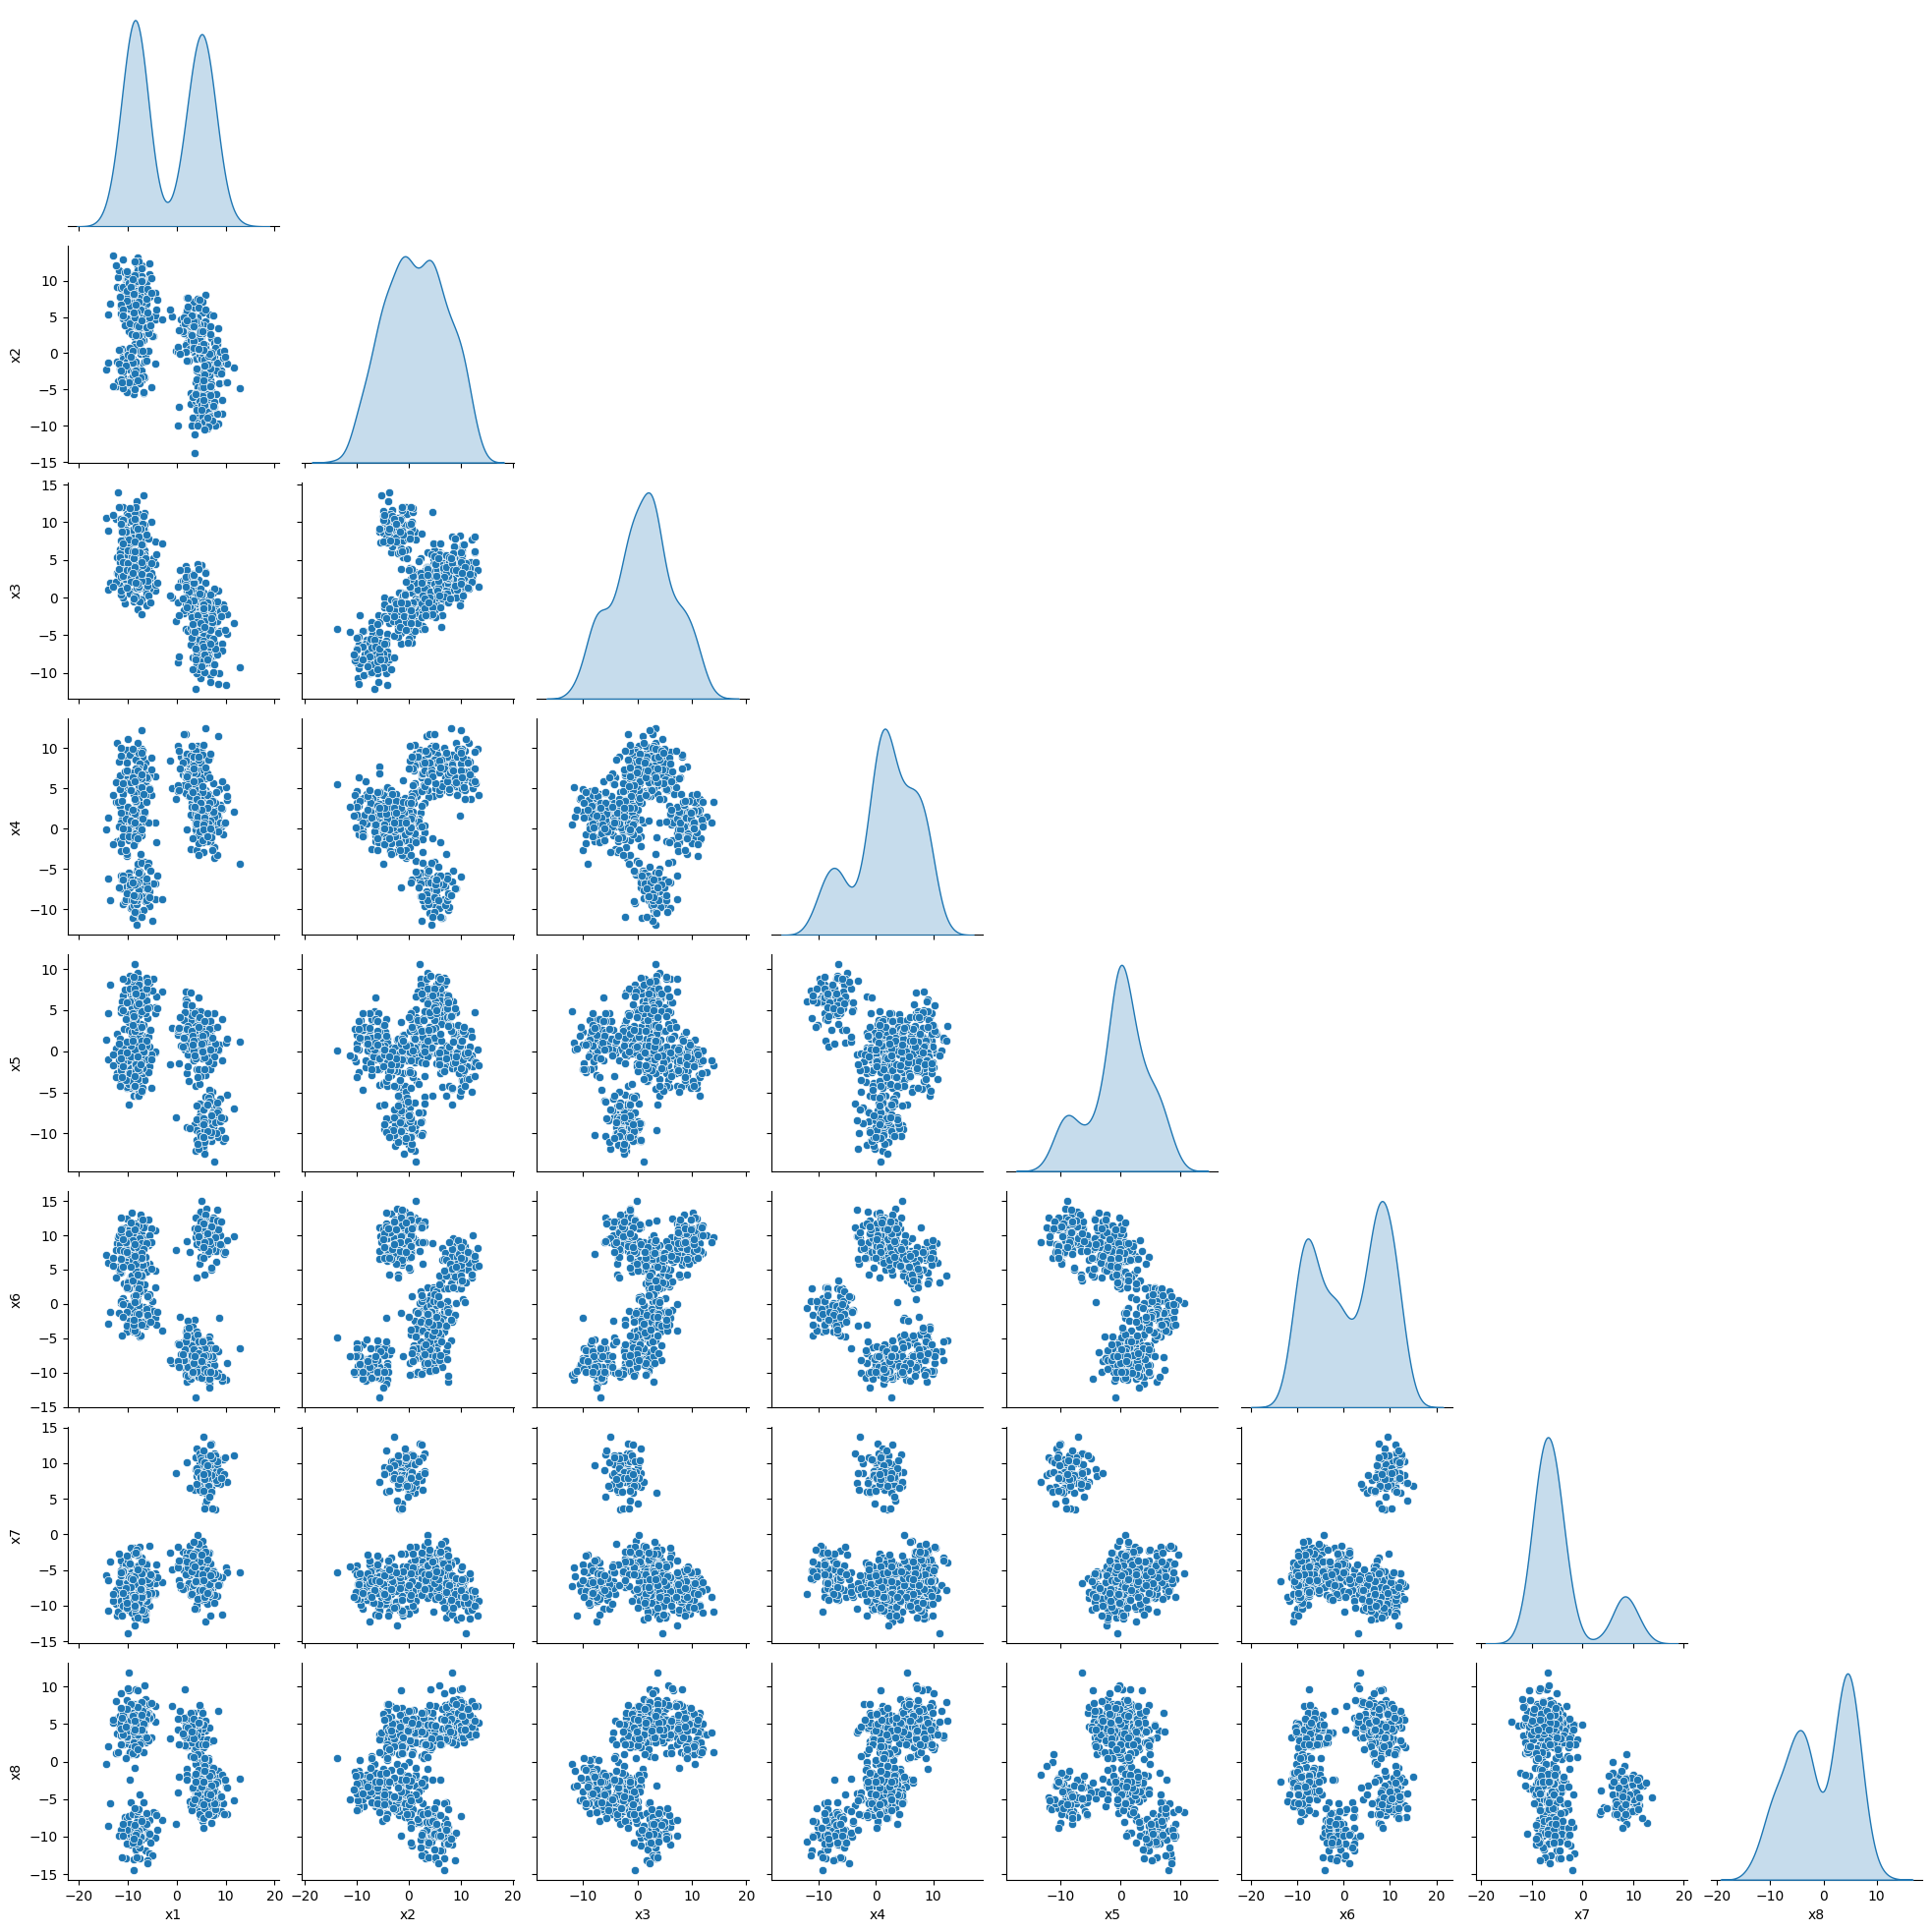

In [282]:
# Pairplot: All pair of variables
ppl = sns.pairplot(dt[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']], corner=True, diag_kind="kde")
plt.show()

### Questions

Based on the previos plots, provide a full description of yout dataset

Your response: En base a los plots realizados se puede afirmar que ciertas graficas contienen variables que son muy similares entre sí, pues parece ser que sus observaciones comparten un espacio en común, como por ejemplo la x5 y x4; o la x8 o la x2. Por otro lado, hay algunas en las que sus valores se encuentran un poco alejadas, como la x3 y x2; o la x1 y x8. Por último, parece ser que los valores se agrupan en grupos de 3 por lo que utilizare este número para trabajar con el cluster.




## d) Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plots

In [283]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3, n_init="auto")

Cluster1 = km.fit_predict(dt[['x1', 'x2']] )

Cluster1

array([0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 2, 1, 2, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0,
       0, 0, 1, 0, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 0,
       2, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0,
       2, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 1, 0, 0, 0,
       0, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0,
       0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 2, 2, 0, 1, 0, 1,
       1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0,
       0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1,

Add to your dataset a column with the estimated cluster to each data point

In [284]:
# Insert that column in the data frame
dt.insert(9, "Cluster", Cluster1, True)

dt.head()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,Cluster
0,0,0.869695,4.650194,2.135345,8.941562,0.663149,-7.358718,-7.601344,5.991406,0
1,1,-9.223693,-3.245195,8.810585,0.074535,-0.489090,7.482702,-4.854415,4.547358,2
2,2,7.777031,-1.670355,-3.182830,2.069812,-7.556666,8.759035,3.530956,-7.062885,0
3,3,-0.923299,5.103181,-0.035035,4.980418,2.772040,-8.598040,-4.857350,7.401998,1
4,4,-10.958181,-0.521441,11.979776,0.679448,-1.157686,7.415256,-7.321623,3.767492,2


Print the number associated to each cluster

In [285]:
print("Cluster Centers:", km.cluster_centers_)
print("Labels for each point:", Cluster1)

Cluster Centers: [[ 5.11406091 -1.45169571]
 [-8.27459867  7.79534116]
 [-9.00820001 -1.64329179]]
Labels for each point: [0 2 0 1 2 1 0 0 1 1 0 0 0 2 0 1 0 0 1 1 0 0 0 1 1 1 0 2 1 2 2 1 1 0 0 0 1
 1 1 0 1 2 0 0 0 0 1 0 1 2 0 1 2 1 2 0 1 2 0 0 0 0 1 1 1 1 0 0 2 2 0 1 0 1
 1 2 1 2 0 1 2 0 1 0 0 0 0 0 0 2 2 1 1 0 0 0 0 0 2 0 1 1 0 0 2 0 1 0 0 0 2
 1 1 0 0 1 2 0 0 1 0 0 2 0 1 0 0 0 0 2 0 0 0 0 0 1 0 1 0 2 0 1 1 1 1 0 2 2
 0 0 1 0 0 0 2 0 0 2 2 0 0 2 1 1 1 2 1 1 0 2 2 0 1 0 0 0 0 1 1 2 2 0 0 2 0
 2 0 1 0 0 1 0 0 2 0 0 2 0 1 0 0 1 0 1 0 1 1 0 1 0 0 2 0 0 1 0 0 0 2 0 0 1
 1 1 2 0 0 0 0 2 1 0 0 2 0 1 2 2 0 1 0 1 1 1 2 0 1 0 0 1 1 0 0 0 1 1 0 2 0
 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 2 0 1 0 0 0 2 1 1 1 1 0 0 2 1
 0 1 1 0 1 1 0 0 1 1 2 1 0 0 0 2 0 0 0 2 0 2 0 1 2 1 0 0 1 1 2 1 0 0 0 0 0
 1 2 0 1 2 1 1 1 1 0 0 2 0 2 2 1 2 0 2 0 0 0 0 0 0 0 2 1 0 0 0 1 0 0 0 0 0
 0 0 2 1 1 0 0 0 1 0 2 0 0 0 2 1 0 0 1 2 0 2 0 0 2 1 1 2 2 1 1 2 0 0 2 0 2
 1 2 1 1 1 0 0 2 0 1 1 1 2 0 0 0 1 0 0 0 1 0 1 0 0 0 

Print the centroids

In [286]:
km.cluster_centers_

array([[ 5.11406091, -1.45169571],
       [-8.27459867,  7.79534116],
       [-9.00820001, -1.64329179]])

Print the intertia metric

In [287]:
# Print sum of squared error (sse) of the final model
km.inertia_

10937.424335298962

Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

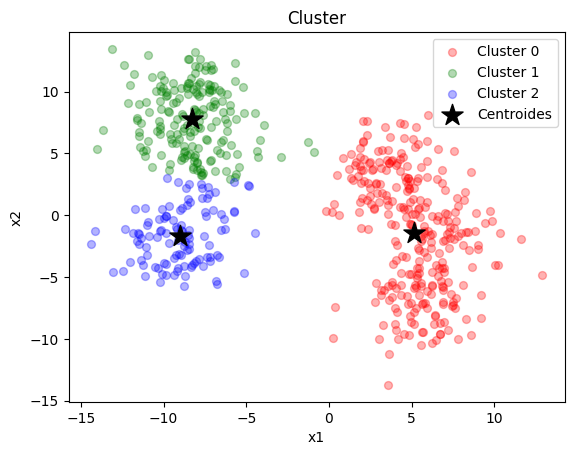

In [288]:
df1 = dt[dt.Cluster==0]
df2 = dt[dt.Cluster==1]
df3 = dt[dt.Cluster==2]

# Scatter plot of each estimated cluster
plt.scatter(df1.x1, df1.x2, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.x1, df2.x2, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.x1, df3.x2, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Cluster')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Questions

Provides a detailed description of your results

Your response: En este análisis, se realizó un agrupamiento utilizando el algoritmo KMeans sobre un conjunto de datos pero para ser un poco más prácticos he trabajado con x1 y x2. En este gráfico se identificaron clústeres (grupos) dentro de los datos para poder analizar de mejor manera su distribución en el espacio. Con esto en cuenta se pudo concluir que los clústeres resultaron estar bien definidos, lo que indica que los datos tienen una estructura clara y que el algoritmo KMeans fue efectivo para separarlos en grupos distintos, a su vez, los centroides de cada clúster muestran el punto central de cada grupo, lo que ayuda a entender las tendencias y diferencias entre ellos.


## d) Elbow plot

Compute the Elbow plot

In [289]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(dt[['x1','x2']])
    # Save sse for each k
    sse.append(km.inertia_)

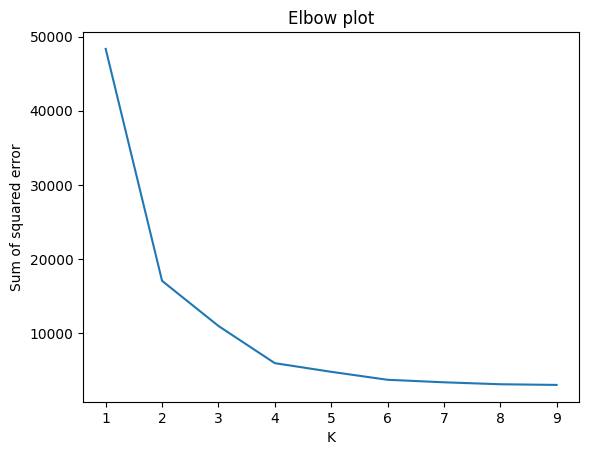

In [290]:
# Plot sse versus k
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

### Questions

What is the best number of clusters K? (argue your response):
El gráfico de codo muestra que la suma de errores cuadrados (SSE) disminuye rápidamente hasta K=3, donde la curva comienza a aplanarse. Esto sugiere que K=3 es el número óptimo de clusters, ya que agregar más clusters no mejora significativamente la reducción del SSE, lo que indica un equilibrio entre la precisión y la simplicidad del modelo. Sin embargo, podría ser tanto 3 o 4 a mi forma de verlo.

Does this number of clusters agree with your initial guess? (argue your response, no problem at all if they do not agree):
Sí, K=3 coincide con lo que pensaba, ya que, aunque el gráfico parece no mostrar un punto de inflexión tan claro, si tiene un cambio, sin embargo, también se podría considerar 4.


# PART 2

## Do clustering using the "digits" dataset

1) Load the dataset from "sklearn.datasets"


In [292]:
from sklearn.datasets import load_digits
digits= load_digits()
dg = pd.DataFrame(digits.data)
dg.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


2) Plot some of the observations (add in the title the label/digit of that obserbation)

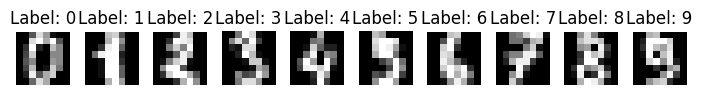

In [305]:
# Visualizar las primeras 5 imágenes y sus etiquetas/dígitos
fig, axes = plt.subplots(1, 10, figsize=(7, 7))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.images[i], cmap=plt.cm.gray)
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

3) Do K means clustering in the following cases:

* KmeansAll: Using all 64 variables/pixels/features

* Kmeans1row: Using only the 8 variables/pixels/features from the firt row

* Kmeans4row: Using only the 8 variables/pixels/features from the fourth row

* Kmeans8row: Using only the 8 variables/pixels/
features from the eighth row


In [311]:

# Caso 1: KMeans con todas las 64 características/píxeles
kmeans_all = KMeans(n_clusters=10, n_init=10)
kmeans_all.fit(digits.data)  # Usamos todas las 64 características
labels_all = kmeans_all.labels_

# Imprimir los resultados de KMeans con todas las 64 características
print("KMeans con todas las 64 características:")
print(labels_all[:10])  # Mostrar las etiquetas de los primeros 10 puntos
print("\n" + "="*50 + "\n")

# Caso 2: KMeans usando solo las 8 características de la primera fila
X_1row = digits.data[:, :8]
kmeans_1row = KMeans(n_clusters=10, n_init=10)
kmeans_1row.fit(X_1row)
labels_1row = kmeans_1row.labels_

# Imprimir los resultados de KMeans con las características de la primera fila
print("KMeans con las características de la primera fila (8 píxeles):")
print(labels_1row[:10])  # Mostrar las etiquetas de los primeros 10 puntos
print("\n" + "="*50 + "\n")

# Caso 3: KMeans usando solo las 8 características de la cuarta fila
X_4row = digits.data[:, 24:32]
kmeans_4row = KMeans(n_clusters=10, n_init=10)
kmeans_4row.fit(X_4row)
labels_4row = kmeans_4row.labels_

# Imprimir los resultados de KMeans con las características de la cuarta fila
print("KMeans con las características de la cuarta fila (8 píxeles):")
print(labels_4row[:10])  # Mostrar las etiquetas de los primeros 10 puntos
print("\n" + "="*50 + "\n")

# Caso 4: KMeans usando solo las 8 características de la octava fila
X_8row = digits.data[:, 56:64]
kmeans_8row = KMeans(n_clusters=10, n_init=10)
kmeans_8row.fit(X_8row)
labels_8row = kmeans_8row.labels_

# Imprimir los resultados de KMeans con las características de la octava fila
print("KMeans con las características de la octava fila (8 píxeles):")
print(labels_8row[:10])  # Mostrar las etiquetas de los primeros 10 puntos
print("\n" + "="*50 + "\n")

KMeans con todas las 64 características:
[5 0 0 1 2 4 3 6 4 4]


KMeans con las características de la primera fila (8 píxeles):
[0 8 3 4 5 6 8 7 4 6]


KMeans con las características de la cuarta fila (8 píxeles):
[3 2 0 9 1 2 1 4 4 7]


KMeans con las características de la octava fila (8 píxeles):
[4 1 0 1 8 3 6 9 3 7]




4) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the clusterization was correct or incorrect

Verificación de KMeans con todas las 64 características:


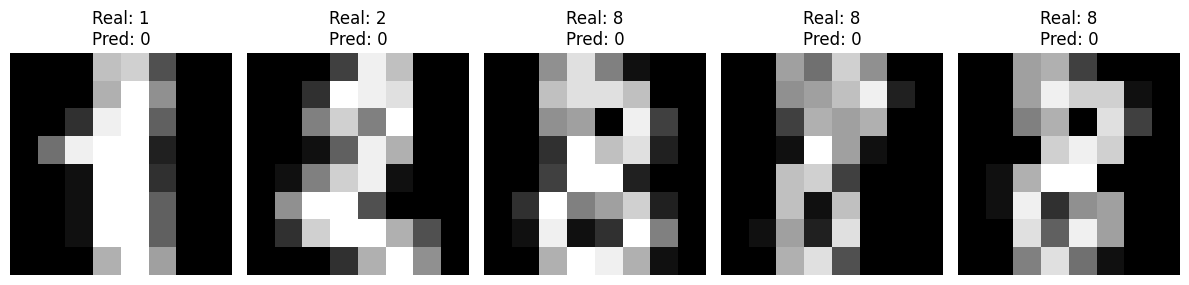

Verificación de KMeans con las características de la primera fila:


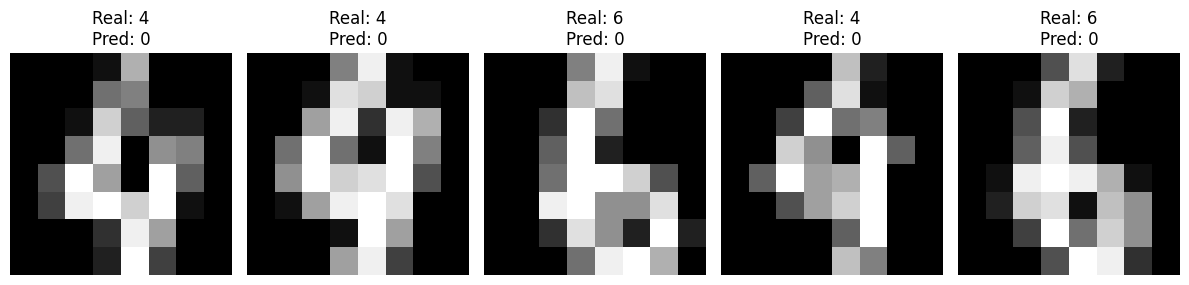

Verificación de KMeans con las características de la cuarta fila:


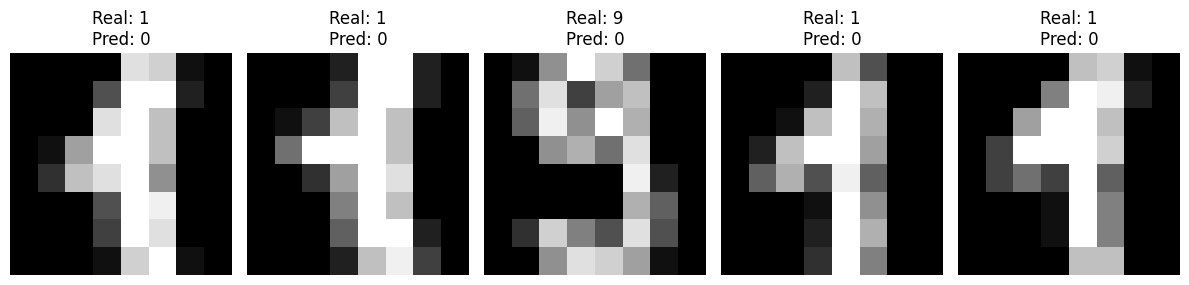

Verificación de KMeans con las características de la octava fila:


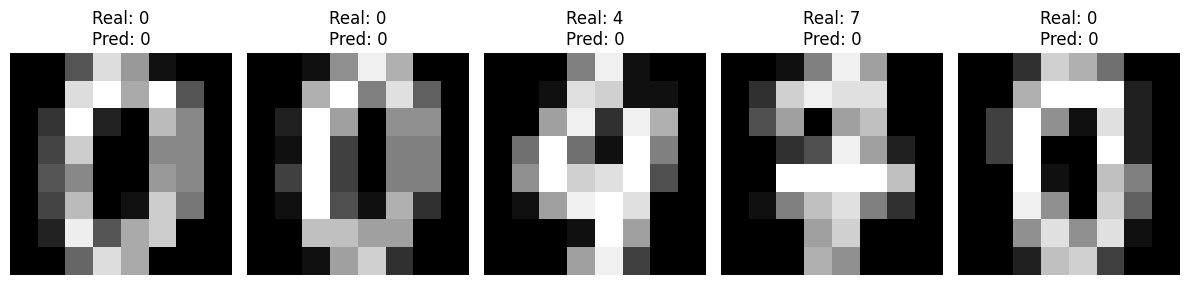

In [309]:
# Caso 1: KMeans con todas las 64 características/píxeles
kmeans_all = KMeans(n_clusters=10, n_init=10)
kmeans_all.fit(digits.data)  # Usamos todas las 64 características
labels_all = kmeans_all.labels_

# Visualización para verificar las etiquetas
def plot_verification(digits, labels, cluster_num):
    fig, axes = plt.subplots(1, 5, figsize=(12, 3))  # 5 imágenes por fila
    selected_images = [i for i in range(len(digits.images)) if labels[i] == cluster_num]

    # Seleccionamos las primeras 5 imágenes que pertenecen al cluster
    for i, ax in enumerate(axes.ravel()):
        if i < len(selected_images):
            index = selected_images[i]
            ax.imshow(digits.images[index], cmap=plt.cm.gray)
            ax.set_title(f"Real: {digits.target[index]}\nPred: {labels[index]}")
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Verificación para el caso KMeans con todas las 64 características (Cluster 0)
print("Verificación de KMeans con todas las 64 características:")
plot_verification(digits, labels_all, cluster_num=0)

# Caso 2: KMeans usando solo las 8 características de la primera fila
X_1row = digits.data[:, :8]
kmeans_1row = KMeans(n_clusters=10, n_init=10)
kmeans_1row.fit(X_1row)
labels_1row = kmeans_1row.labels_

# Verificación para el caso KMeans con las características de la primera fila (Cluster 0)
print("Verificación de KMeans con las características de la primera fila:")
plot_verification(digits, labels_1row, cluster_num=0)

# Caso 3: KMeans usando solo las 8 características de la cuarta fila
X_4row = digits.data[:, 24:32]
kmeans_4row = KMeans(n_clusters=10, n_init=10)
kmeans_4row.fit(X_4row)
labels_4row = kmeans_4row.labels_

# Verificación para el caso KMeans con las características de la cuarta fila (Cluster 0)
print("Verificación de KMeans con las características de la cuarta fila:")
plot_verification(digits, labels_4row, cluster_num=0)

# Caso 4: KMeans usando solo las 8 características de la octava fila
X_8row = digits.data[:, 56:64]
kmeans_8row = KMeans(n_clusters=10, n_init=10)
kmeans_8row.fit(X_8row)
labels_8row = kmeans_8row.labels_

# Verificación para el caso KMeans con las características de la octava fila (Cluster 0)
print("Verificación de KMeans con las características de la octava fila:")
plot_verification(digits, labels_8row, cluster_num=0)

5) Compute the Elbow plot

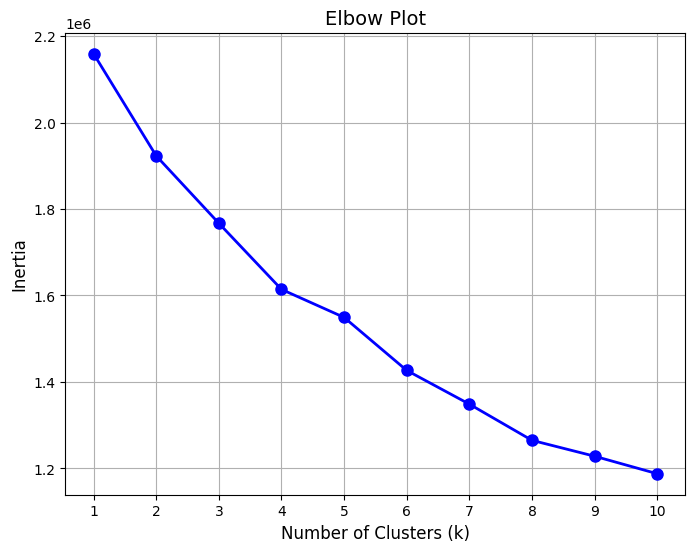

In [312]:
# Definir el rango de k (número de clústeres) a evaluar
k_range = range(1, 11)  # Evaluar de 1 a 10 clústeres
inertia_values = []

# Calcular la inercia para cada valor de k
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
    kmeans.fit(digits.data)  # Usar todas las características (64 píxeles)
    inertia_values.append(kmeans.inertia_)

# Graficar el Elbow Plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title('Elbow Plot', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(k_range)
plt.grid(True)
plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the clusterization is better, with KmeansAll, Kmeans1row, Kmeans4row, or Kmeans8row).

Your response (argue your response): En general, el clustering con KMeansAll (todas las características) es el que ofrece mejores resultados, ya que utiliza toda la información disponible de cada imagen (los 64 píxeles), lo que permite una mejor diferenciación entre los dígitos. Por otro lado, los modelos que solo utilizan una fila de píxeles (KMeans1row, KMeans4row, y KMeans8row) tienden a ser menos precisos, ya que la información es más limitada y se pierde gran parte de la variabilidad de las imágenes.

# PART 3
## Do classification using the "digits" dataset

1) Load the dataset from "sklearn.datasets"

2) Plot some of the observations  (add in the title the label/digit of that obserbation)

3) Split the dataset in train and test

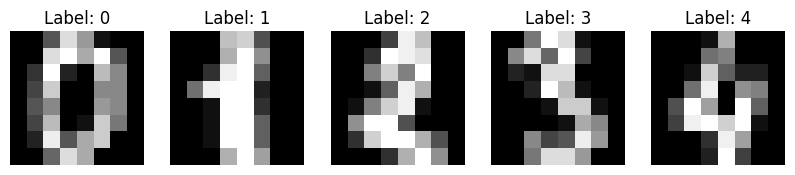

In [316]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# 1. Cargar el conjunto de datos
digits = load_digits()
x = digits.data
y = digits.target

# 2. Graficar algunas observaciones
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Label: {digits.target[i]}')
    ax.axis('off')

plt.show()

# 3. Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Normalizar los datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

4) Tune a classifier (Use the train set) in the following cases:

* ClassifierAll: Using all 64 variables/pixels/features

* Classifier1col: Using only the 8 variables/pixels/features from the firt column

* Classifier4col: Using only the 8 variables/pixels/features from the fourth column

* Classifier8col: Using only the 8 variables/pixels/
features from the eighth column

Note: in these four cases always use the same classification algorithm, e.g., a Suport Vector Machine


In [325]:
from sklearn.svm import SVC

# ClassifierAll: Usando todas las 64 características
svm_all = SVC(kernel='linear', random_state=42)
svm_all.fit(X_train, y_train)

# Classifier1col: Usando solo las 8 características de la primera columna
svm_1col = SVC(kernel='linear', random_state=42)
svm_1col.fit(X_train[:, :8], y_train)

# Classifier4col: Usando solo las 8 características de la cuarta columna
svm_4col = SVC(kernel='linear', random_state=42)
svm_4col.fit(X_train[:, 24:32], y_train)

# Classifier8col: Usando solo las 8 características de la octava columna
svm_8col = SVC(kernel='linear', random_state=42)
svm_8col.fit(X_train[:, 56:64], y_train)

SVC(kernel='linear', random_state=42)

5) Make predictions (use the test set)

In [331]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Predicciones
y_pred_all = svm_all.predict(X_test)
y_pred_1col = svm_1col.predict(X_test[:, :8])
y_pred_4col = svm_4col.predict(X_test[:, 24:32])
y_pred_8col = svm_8col.predict(X_test[:, 56:64])

# Calcular la precisión de cada clasificador
accuracy_all = accuracy_score(y_test, y_pred_all)
accuracy_1col = accuracy_score(y_test, y_pred_1col)
accuracy_4col = accuracy_score(y_test, y_pred_4col)
accuracy_8col = accuracy_score(y_test, y_pred_8col)

# Imprimir las precisiones
print(f'Accuracy using all 64 features: {(accuracy_all * 100):.2f}%')
print(f'Accuracy using only the first 8 features: {(accuracy_1col * 100):.2f}%')
print(f'Accuracy using only the fourth 8 features: {(accuracy_4col * 100):.2f}%')
print(f'Accuracy using only the eighth 8 features: {(accuracy_8col * 100):.2f}%')


Accuracy using all 64 features: 97.50%
Accuracy using only the first 8 features: 41.39%
Accuracy using only the fourth 8 features: 64.17%
Accuracy using only the eighth 8 features: 50.56%


6) Compute performance metrics

In [332]:

# Calcular las matrices de confusión para cada clasificador
conf_matrix_all = confusion_matrix(y_test, y_pred_all)
conf_matrix_1col = confusion_matrix(y_test, y_pred_1col)
conf_matrix_4col = confusion_matrix(y_test, y_pred_4col)
conf_matrix_8col = confusion_matrix(y_test, y_pred_8col)

print("Confusion Matrix for ClassifierAll:")
print(conf_matrix_all)
print("\nConfusion Matrix for Classifier1col:")
print(conf_matrix_1col)
print("\nConfusion Matrix for Classifier4col:")
print(conf_matrix_4col)
print("\nConfusion Matrix for Classifier8col:")
print(conf_matrix_8col)

Confusion Matrix for ClassifierAll:
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  1]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  1]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  1  0 36  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  3  0  0  0  0  0  1 31  0]
 [ 0  0  0  0  0  0  0  1  0 35]]

Confusion Matrix for Classifier1col:
[[13  1  5  0  1  0 10  2  3  1]
 [ 6 11  0  1  0  0 11  1  5  1]
 [ 3  1 24  2  0  0  2  1  1  1]
 [ 3  0  9 19  1  1  0  1  3  0]
 [ 2  1  0  0 23  0 10  0  0  0]
 [ 0  1  2  5  0 22  0  4  3  0]
 [ 4  4  0  0  8  0 17  0  3  0]
 [ 4  0  6  6  0  4  0 13  3  0]
 [ 5  6  7  4  1  3  2  2  5  0]
 [ 6  4 10  2  0  0  3  5  4  2]]

Confusion Matrix for Classifier4col:
[[36  0  0  0  0  0  0  0  0  0]
 [ 1 10  3 10  0  9  1  1  0  1]
 [ 0  1 28  3  1  0  0  2  0  0]
 [ 0  5  8 24  0  0  0  0  0  0]
 [ 2  1  0  0 29  0  1  0  2  1]
 [ 0  6  0  0  0 22  3  0  1  5]
 [ 0  2  0  0  1  1 31  0  1

7) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the classification was correct or incorrect

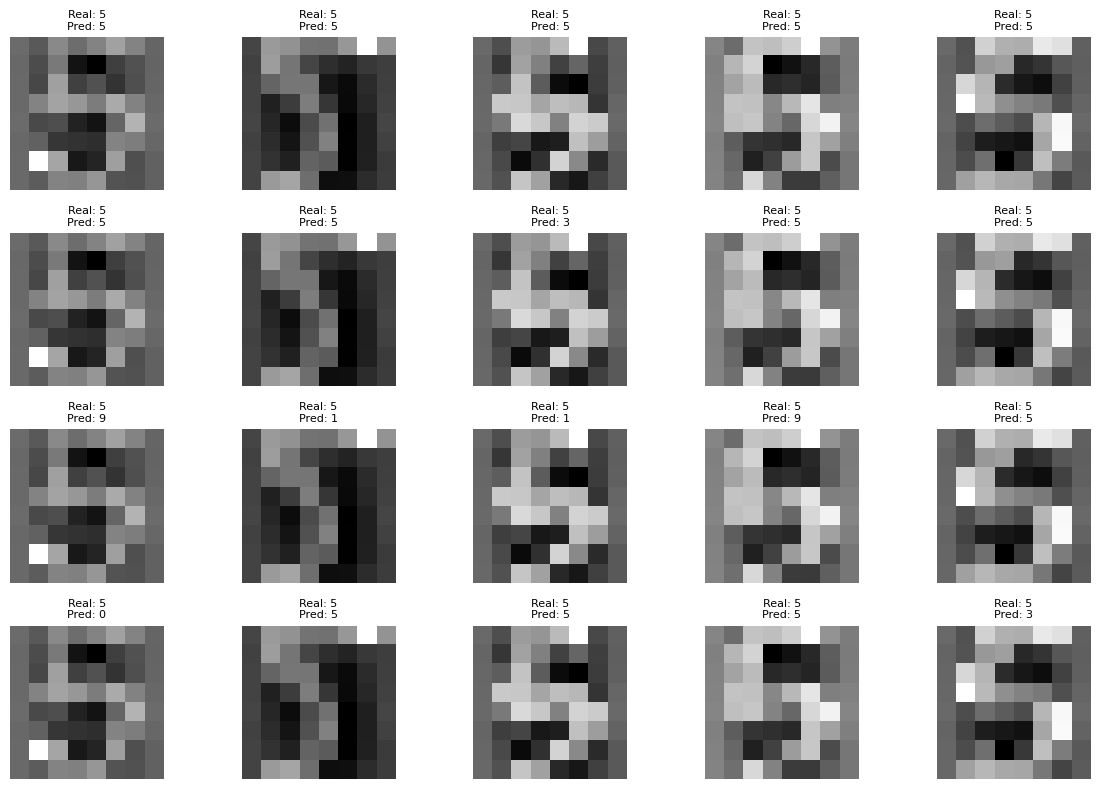

In [333]:
# Dígito a verificar
digit_to_check = 5

# Encuentra las imágenes del dígito seleccionado en el conjunto de test
indices = np.nonzero(y_test == digit_to_check)[0][:5]  # Primeras 5 imágenes del dígito 3

# Crear un gráfico con subplots (una fila por clasificador, una columna por imagen)
fig, axes = plt.subplots(4, len(indices), figsize=(12, 8))

# Nombres de los clasificadores para etiquetar cada fila
model_names = ['ClassifierAll', 'Classifier1col', 'Classifier4col', 'Classifier8col']
predictions = [
    y_pred_all,
    y_pred_1col,
    y_pred_4col,
    y_pred_8col
]

# Iterar sobre los clasificadores y las imágenes seleccionadas
for row, name in enumerate(model_names):
    for col, idx in enumerate(indices):
        image = X_test[idx].reshape(8, 8)  # Redimensionar la imagen
        real_label = y_test[idx]  # Etiqueta real
        estimated_label = predictions[row][idx]  # Predicción del modelo

        axes[row, col].imshow(image, cmap='gray')
        axes[row, col].set_title(f'Real: {real_label}\nPred: {estimated_label}', fontsize=8)
        axes[row, col].axis('off')

    axes[row, 0].set_ylabel(name, fontsize=10)  # Etiqueta de la fila con el clasificador

plt.tight_layout()
plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the classification performance is better, with ClassifierAll, Classifier1col, Classifier4col, or Classifier8col).

Your response (argue your response): El rendimiento de clasificación es mejor cuando se utilizan todas las características (ClassifierAll), ya que con 64 variables/píxeles el modelo tiene acceso a más información para distinguir entre los diferentes dígitos, lo que le permite realizar predicciones más precisas. En contraste, al usar solo una parte de las características, como las columnas 1, 4 u 8 (Classifier1col, Classifier4col, Classifier8col), el rendimiento disminuye significativamente. Esto se debe a que la información proporcionada por un solo conjunto de píxeles no es suficiente para una clasificación precisa, lo que limita la capacidad del modelo para diferenciar entre los dígitos.

# PART 4

## Descripción de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta: Para ser sincero, algunos de los temas que trabajamos durante esta semana resultaron ser totalmente nuevos para mí, pero, con ayuda del profesor y la constante práctica siento que he mejorado bastante mis habilidades para trabajar con los conjuntos de datos, el manejo de ellos, la interacción con variables, entre otros.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta: Personalmente, siento que si tengo la capacidad de poder construir este tipo de modelos, pero debo seguir practicando constantemente, ya que, recibimos mucha cantidad de información con la que trabajamos en una sola semana.